Task B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import autograd  


B1

It is because the search direction (gradient) has a magnitude. If the gradient was normalized then the step size would be the length. 


B2

1. Reach max number of iterations.
Pros: Will allways terminate, regardless of whether the algorithm converges or diverges.
Cons: If diverging, another SC might have stopped erlier. Max number may be too little 

2. Gradient close enough to zero.
Pros: When close to the min. the algorthim will stop rather then making small imporvments.
Cons: Will never find true min.

B3 - a

Alg.3 The Gradient Decent Alg.

#Define the function
def f(x):
    -> -e^-(x-3.14)^2


#Function for solving gradient for fx
def df(x)
    -> 2*(x-3.14)*e^(-(x-3.14)^2)

#Max number of updates
T = 

#Starting guess
x0 = 

#Step size
n = 

#Allowed fault in gradient
f = 

for t in 0->T
    #See if gradient is sufficiently close to zero
    if abs(df(x0)) < f
        #break if it is
        break
    #Update x0 if not
    x0 = x0 - n * fx_grad



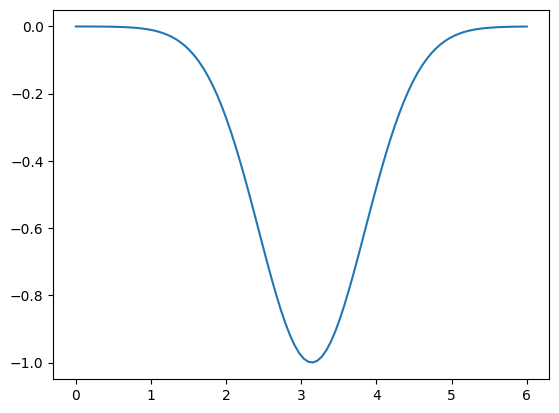

In [4]:
#B3 - B

x = np.linspace(0, 6, 100)
fx = -np.exp(-(x-3.14)**2)

plt.plot(x, fx)
plt.show()

#Minima seems to be at 3.14. 
#Yes. Looking at the function. -e^-1 (when x=3.14) is negative one. Reading the expression as -1/e^(x-3.14)^2, one can see that the denominator grows infinitly large when x increaces or decreases and hence the whole expression must grow infinitly small. 
#Also looking at the derivative it is clear that is is zero only when x = 3.14

In [11]:
#B3 - C

x = 0
T = 10000
n = 0.1

def f(x):
    return -np.exp(-(x-3.14)**2)

def df(x):
    return 2*(x-3.14)*np.exp(-(x-3.14)**2)

for i in range(T):
    if abs(df(x)) < 1e-10:
        print("Found minima at x = ", x)
        break
    x -= n*df(x)


Found minima at x =  3.139999999955194


Found minima at x =  3.1399999999706862


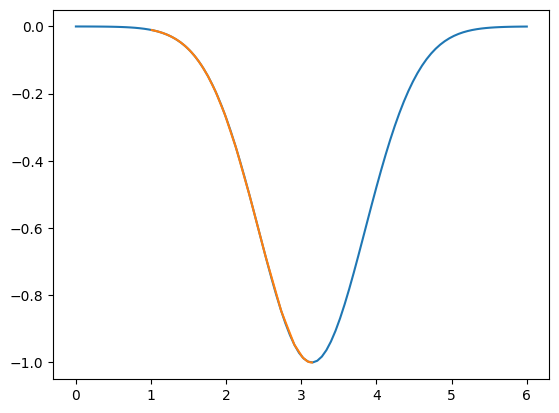

In [12]:
#B3 - C & D
trajectory_x = []
trajectory_fx = []

x = 1
T = 1000
n = 0.25
f_ = 1e-10

def f(x):
    return -np.exp(-(x-3.14)**2)

def df(x):
    return 2*(x-3.14)*np.exp(-(x-3.14)**2)

for i in range(T):
    if abs(df(x)) < f_:
        print("Found minima at x = ", x)
        break
    x -= n*df(x)
    trajectory_x.append(x)
    trajectory_fx.append(f(x))

x_ = np.linspace(0, 6, 100)
fx = -np.exp(-(x_-3.14)**2)

plt.plot(x_, fx)
plt.plot(trajectory_x, trajectory_fx)
plt.show()

B3 - E

The function presented now is the inverse of the one used in the previous problems. Since finding the maximum of a function is the same as finding the minimum of its inverse, nothing needs to change.

Task C

C1 - 1

df = 4(x-1)^3
df(2) = 4

In [8]:
#C1 - 2

def f(x):
    return torch.pow((x-1), 4) + 3

x0 = torch.tensor(2.0, requires_grad=True)

fx0 = f(x0)
fx0.backward()

x0.grad


tensor(4.)

C1 - 3
They are the same!

In [22]:
#C2 - a

def f_loop(z):
    start = 0
    stop_plus_one = 3
    step = 1
    n_values = np.arange(start, stop_plus_one, step)
    s = 0
    for n in n_values:
        s += torch.pow(z,n)
        n += 1
    return s

z0 = torch.tensor(2.0, requires_grad=True)
fz0 = f_loop(z0)

fz0.backward()
z0.grad


tensor(5.)

C3 - 1

df/dx = y + z + 2x + z*cos(x)

df/dy = x + z + e^y

df/dz = x + y + sin(x)

C3 - 2

df/dx = y + z + 2x + z*cos(x) = 2+2+2*pi+2*cos(pi) = 8.28...

df/dy = x + z + e^y = pi+2+e^2= 12.53...

df/dz = x + y + sin(x) = pi+2+sin(pi)= 5.14...

In [5]:
#C3 - 3

def f(x,y,z):
    return x*y + x*z + y*z + torch.pow(x,2) + torch.exp(y) + z*torch.sin(x)

x0 = torch.tensor(torch.pi, requires_grad=True)
y0 = torch.tensor(2.0, requires_grad=True)
z0 = torch.tensor(2.0, requires_grad=True)

g_values = f(x0,y0,z0)
print(g_values)
g_values.backward()

print(x0.grad)
print(y0.grad)
print(z0.grad)

tensor(33.8250, grad_fn=<AddBackward0>)
tensor(8.2832)
tensor(12.5306)
tensor(5.1416)


C3 - 4

They are the same!

In [22]:
#C4

def f(x):
    one_vector = torch.ones_like(x)
    return (x- one_vector).T @ (x - one_vector)

x0 = torch.zeros(size=[4], requires_grad=True)
x1 = torch.ones(size=[4], requires_grad=True)
x2 = torch.tensor([1.5, 1.5, 1.5, 1.5], requires_grad=True)

fx0 = f(x0)
fx1 = f(x1)
fx2 = f(x2)

fx0.backward()
fx1.backward()
fx2.backward()

print(x0.grad)
print(x1.grad)
print(x2.grad)

tensor([-2., -2., -2., -2.])
tensor([0., 0., 0., 0.])
tensor([1., 1., 1., 1.])


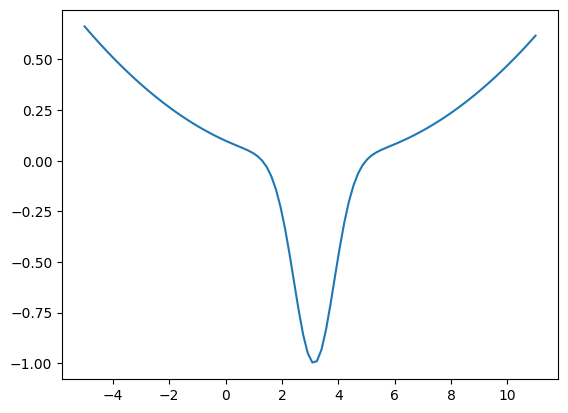

In [24]:
#D1 - 1

def f(x):
    return 0.01 * torch.pow(x - torch.pi, 2) - torch.exp(-torch.pow(x-torch.pi, 2))

x_ = torch.linspace(-5, 11, 100)

plt.plot(x_, f(x_))
plt.show()


Task D

C:\Users\pontu\AppData\Local\Temp\ipykernel_15340\3584990316.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_np = float(x_np)


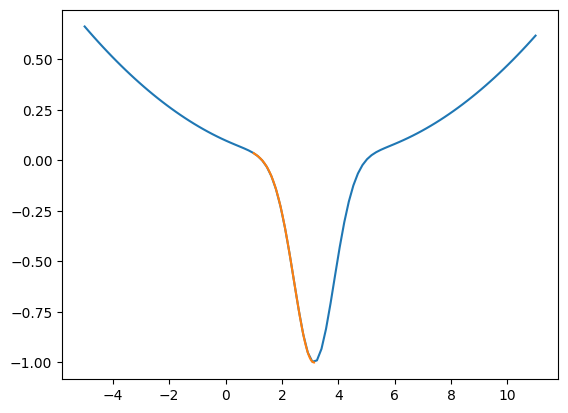

In [9]:
#D1 - 2
trajectory_x = []
trajectory_fx = []

def f(x):
    return 0.01 * torch.pow(x - torch.pi, 2) - torch.exp(-torch.pow(x-torch.pi, 2))

x = torch.tensor([1.0], requires_grad=True) 
eta = 1
T = 1000

for i in range(T):
    fx = f(x)
    fx.backward()
    x_np = x.detach().numpy()
    x_np = float(x_np)
    trajectory_x.append(x_np)

    f_value_np = fx.detach().numpy()
    trajectory_fx.append(f_value_np)
    with torch.no_grad():
        x -= eta*x.grad
        if abs(x.grad) < 1e-10:
            print("Found minima at x = ", x)
            x_np = x.detach().numpy()
            x_np = float(x_np)
            trajectory_x.append(x_np)

            f_value_np = fx.detach().numpy()
            trajectory_fx.append(f_value_np)
            break
    x.grad.zero_()


x = torch.linspace(-5, 11, 100)
fx = f(x)

plt.plot(x, fx)
plt.plot(trajectory_x, trajectory_fx)
plt.show()


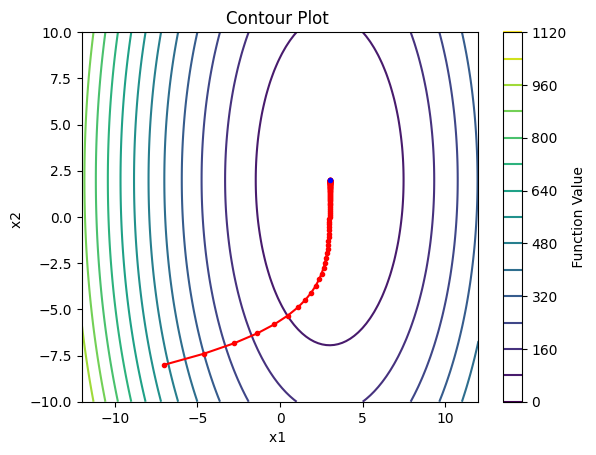

In [10]:
#D2

def f_float ( x1 , x2 ) :
    return (2*( x1 -3) )**2 +( x2 -2)**2

def f_torch ( x ) :
    x1 = x [0]
    x2 = x [1]
    return torch . pow (2*( x1 -3) ,2) + torch . pow ( x2 -2 ,2)

x_start = np . asarray ([ -7.0 , -8.0])
x_start
x = torch . tensor ( x_start , requires_grad = True ) ;
x

n_max =100
trajectory_x1 =[]
trajectory_x2 =[]
trajectory_y =[]
eta =0.03
for n in range ( n_max ) :

    fx = f_torch ( x )

    x_np = x . detach () . numpy ()
    trajectory_x1 . append ( x_np [0])
    trajectory_x2 . append ( x_np [1])

    f_value_np = fx . detach () . numpy ()
    trajectory_y . append ( f_value_np )

    fx . backward ()

    with torch . no_grad () :
        x -= eta * x . grad

    x.grad.zero_ ()

# Define a grid of x and y values
x = np . linspace ( -12 , 12 , 100)
y = np . linspace ( -10 , 10 , 100)

Z = np . empty ([100 ,100])
for i in range (100) :
    for j in range (100) :
        Z [j , i ]= f_float ( x [ i ] , y [ j ]) # NOTE : Indices [j , i ] are switched to make
# it compatible with plt . contour


# Create the contour plot
contour_plot = plt . contour (x , y , Z , levels =15 , cmap = "viridis")
plt . colorbar ( contour_plot , label = " Function Value ")
plt . xlabel ("x1 ")
plt . ylabel ("x2 ")
plt . title ("Contour Plot ")

# Overlay the trajectory on the contour plot
plt . plot ( trajectory_x1 , trajectory_x2 , marker = ".", linestyle ="-", color ="red", label ="Trajectory ")
plt . plot (3 ,2 , marker = ".", linestyle ="-", color ="blue", label ="Optimum ")
plt . show ()

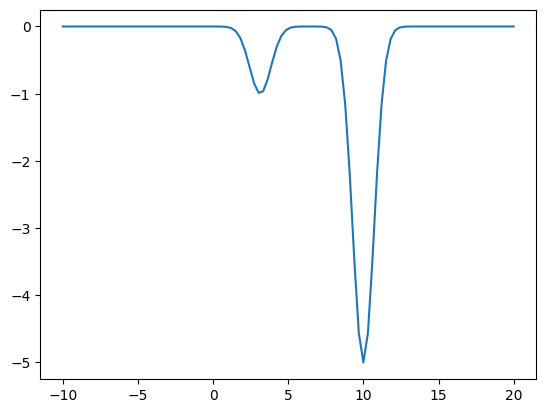

In [37]:
#D3 - a

def f(x):
    return - torch.exp(-(x-3.14)**2) - 5*torch.exp(-(x-10)**2)

x = torch.linspace(-10, 20, 100)

plt.plot(x, f(x))
plt.show()

Function have two minima. Starting guess will decide which minima it converges to.

C:\Users\pontu\AppData\Local\Temp\ipykernel_15340\292753422.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_np = float(x_np)
C:\Users\pontu\AppData\Local\Temp\ipykernel_15340\292753422.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_np = float(x_np)


Found minima at x =  tensor([10.], requires_grad=True)


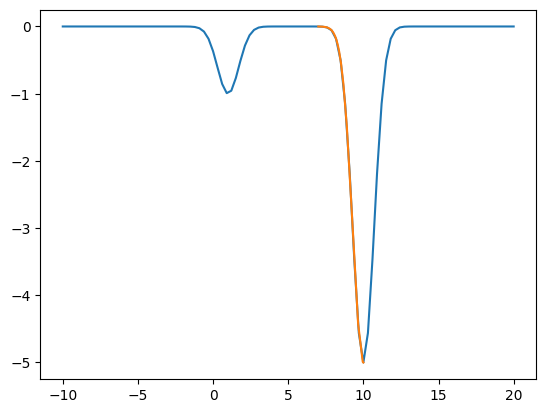

In [26]:
#D3 - b
def f(x):
    return - torch.exp(-(x-1)**2) - 5*torch.exp(-(x-10)**2)

trajectory_x = []
trajectory_fx = []

x = torch.tensor([7.0], requires_grad=True) 
eta = 0.1
T = 1000

for i in range(T):
    fx = f(x)
    fx.backward()
    x_np = x.detach().numpy()
    x_np = float(x_np)
    trajectory_x.append(x_np)

    f_value_np = fx.detach().numpy()
    trajectory_fx.append(f_value_np)
    with torch.no_grad():
        x -= eta*x.grad
        if abs(x.grad) < 1e-10:
            print("Found minima at x = ", x)
            x_np = x.detach().numpy()
            x_np = float(x_np)
            trajectory_x.append(x_np)

            f_value_np = fx.detach().numpy()
            trajectory_fx.append(f_value_np)
            break
    x.grad.zero_()


x = torch.linspace(-10, 20, 100)
fx = f(x)

plt.plot(x, fx)
plt.plot(trajectory_x, trajectory_fx)
plt.show()

D3 - c

Anything bigger the ten is good since it guarantees to converges to global minima. Somewhere around 7 is also doable.

D3 - d

No, only in the x=7 case.

D3 - e

No, it does not converges in either case.

Task E

E-I a

Minimist the surface area of a cylindrical can given by the objective function 2*V/r + 2*pi*r^2, such that the volym is 355 cl.

E-I b

The objective function abive is given by:

Volym of cylinder: V = h*pi*r^2
Surface area of cylinder: A = 2*pi*r*h + 2*pi*r^2

Taking the high out of the volym gives: h = V/(pi*r^2)
Putting the expression into the surface area gives: A = 2*pi*r*(V/(pi*r^2)) + 2*pi*r^2 = 2*V/r + 2*pi*r^2

C:\Users\pontu\AppData\Local\Temp\ipykernel_15340\376735308.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_np = float(x_np)


Found minima at x =  tensor([3.8372], requires_grad=True) with f(x) =  tensor([277.5450], grad_fn=<AddBackward0>)


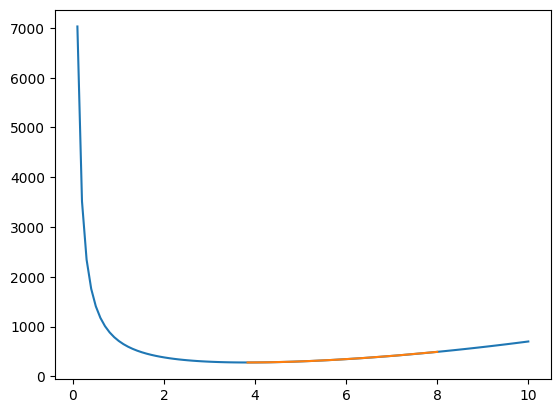

In [36]:
#E-I

def f(r):
    return 710/r + 2*torch.pi*r**2

trajectory_x = []
trajectory_fx = []

x = torch.tensor([8.0], requires_grad=True) 
eta = 0.01
T = 10000

for i in range(T):
    fx = f(x)
    fx.backward()
    x_np = x.detach().numpy()
    x_np = float(x_np)
    trajectory_x.append(x_np)

    f_value_np = fx.detach().numpy()
    trajectory_fx.append(f_value_np)
    with torch.no_grad():
        x -= eta*x.grad
        if abs(x.grad) < 1e-10:
            print("Found minima at x = ", x, "with f(x) = ", f(x))
            x_np = x.detach().numpy()
            x_np = float(x_np)
            trajectory_x.append(x_np)

            f_value_np = fx.detach().numpy()
            trajectory_fx.append(f_value_np)
            break
    x.grad.zero_()

print("Found minima at x = ", x, "with f(x) = ", f(x))

x = torch.linspace(0, 10, 100)
fx = f(x)

plt.plot(x, fx)
plt.plot(trajectory_x, trajectory_fx)
plt.show()

In [70]:
#E-II

def y(x):
    return torch.sum(x)

def z(x):
    return torch.sum(torch.square(x))

def s(y,z):
    return torch.exp(y) + torch.exp(z)

x0 = torch.tensor([0.1, 0.2, 0.3], requires_grad=True)

y0 = y(x0)
z0 = z(x0)
s0 = s(y0, z0)

s0.backward()

print(x0.grad)

tensor([2.0522, 2.2822, 2.5123])


ds/dx1 = e^(x1+x2+x3) + 2*x1*e^((x1^2)+(x2^2)+(x3^2))
ds/dx2 = e^(x1+x2+x3) + 2*x2*e^((x1^2)+(x2^2)+(x3^2))
ds/dx3 = e^(x1+x2+x3) + 2*x3*e^((x1^2)+(x2^2)+(x3^2))

ds/dx1(0.1,0.2,0.3) = 20.22
ds/dx2(0.1,0.2,0.3) = 22.22
ds/dx3(0.1,0.2,0.3) = 2.42


E-III a

Find the minimum of the inverse for the function that describes the concentration of substance X. The minimum = -maximum. If -minimum is smaller than the threshold for chem X to work, we know that the drug does in fact not work. 

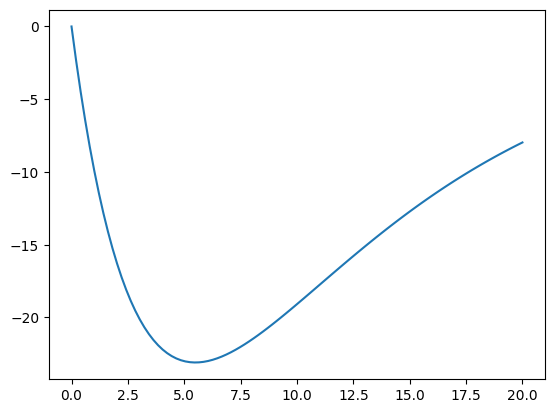

In [40]:
#E-III b

def f(t):
    Vblood = 5.0
    M0 = 400.0
    f = 0.5
    kab = 0.30
    kel = 0.1
    return -((kab * f * M0)/((kab-kel)*Vblood))*(torch.exp(-kel*t) - torch.exp(-kab*t))

x = torch.linspace(0, 20, 100)
f = f(x)

plt.plot(x, f)
plt.show()

C:\Users\pontu\AppData\Local\Temp\ipykernel_15340\1151437997.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_np = float(x_np)


Found minima at x =  tensor([5.4931], requires_grad=True) with f(x) =  tensor([-23.0940], grad_fn=<MulBackward0>)


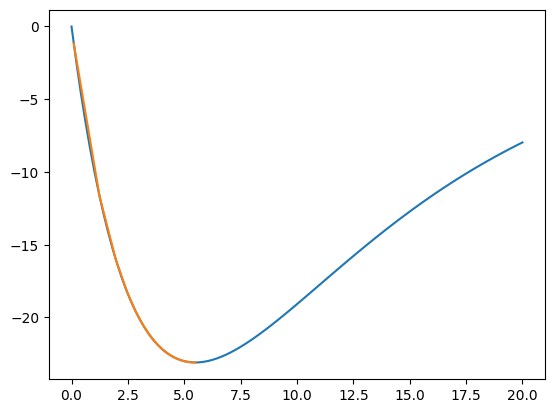

In [44]:
#E-III b

def f(t):
    Vblood = 5.0
    M0 = 400.0
    f = 0.5
    kab = 0.30
    kel = 0.1
    return -((kab * f * M0)/((kab-kel)*Vblood))*(torch.exp(-kel*t) - torch.exp(-kab*t))

trajectory_x = []
trajectory_fx = []

x = torch.tensor([0.1], requires_grad=True)
eta = 0.1
T = 1000

for i in range(T):
    fx = f(x)
    fx.backward()
    x_np = x.detach().numpy()
    x_np = float(x_np)
    trajectory_x.append(x_np)

    f_value_np = fx.detach().numpy()
    trajectory_fx.append(f_value_np)
    with torch.no_grad():
        x -= eta*x.grad
        if abs(x.grad) < 1e-10:
            x_np = x.detach().numpy()
            x_np = float(x_np)
            trajectory_x.append(x_np)

            f_value_np = fx.detach().numpy()
            trajectory_fx.append(f_value_np)
            break
    x.grad.zero_()

print("Found minima at x = ", x, "with f(x) = ", f(x))

x = torch.linspace(0, 20, 100)
fx = f(x)

plt.plot(x, fx)
plt.plot(trajectory_x, trajectory_fx)
plt.show()

Since the maximum concentration of chemical X is below the minimum threshold for the drug to be effective, hence the drug does not work.